In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston = tf.keras.datasets.boston_housing

In [ ]:
boston_data=boston.load_data()

In [ ]:
(x_train, y_train), (x_test,y_test) = boston_data

In [ ]:
x_train_df=pd.DataFrame(x_train)
x_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [ ]:
y_train_df=pd.DataFrame(y_train)
y_train_df

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [ ]:
x_train.shape

(404, 13)

In [ ]:
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13), name="Input-Layer"),
    tf.keras.layers.Dense(100, name="Hidden-Layer-1"),
    tf.keras.layers.BatchNormalization(name="Hidden-Layer-2"),
    tf.keras.layers.Dense(50, name="Hidden-Layer-3"),
    tf.keras.layers.Dense(1, name="Output-Layer")
])

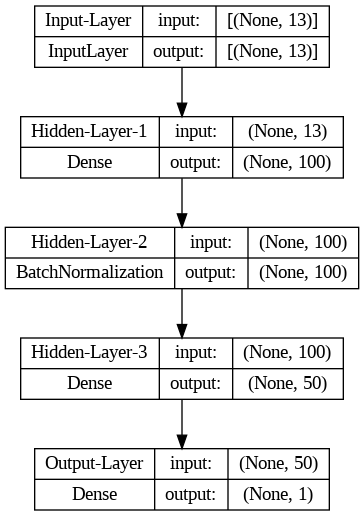

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 100)               1400      
                                                                 
 Hidden-Layer-2 (BatchNorma  (None, 100)               400       
 lization)                                                       
                                                                 
 Hidden-Layer-3 (Dense)      (None, 50)                5050      
                                                                 
 Output-Layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history=model.fit(x_train_scaled, y_train, batch_size=32, validation_data=(x_test_scaled, y_test), epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 18ms/step - loss: 559.7498 - mae: 22.2664 - val_loss: 568.6802 - val_mae: 22.7791
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 521.1940 - mae: 21.9358 - val_loss: 538.0742 - val_mae: 22.3986
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 494.1133 - mae: 21.5176 - val_loss: 513.3647 - val_mae: 21.9127
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 467.2631 - mae: 20.9194 - val_loss: 473.9728 - val_mae: 21.1659
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 427.6900 - mae: 20.0268 - val_loss: 426.9720 - val_mae: 20.0714
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 374.9425 - mae: 18.6840 - val_loss: 360.0148 - val_mae: 18.3397
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 301.5005 - mae: 16.5401 - val_loss: 266.2681 - val_mae: 15.6063
Epoch 8/20
13/13 [=============================

<Axes: >

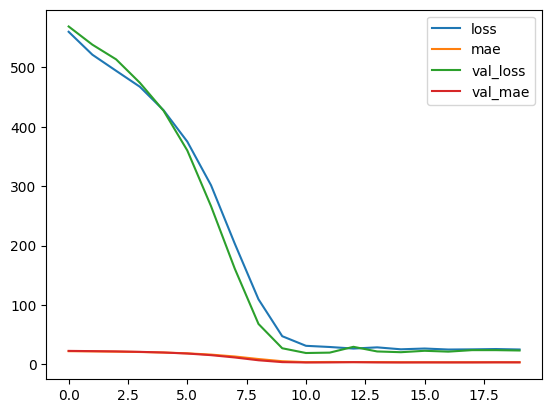

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred= model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


<Axes: >

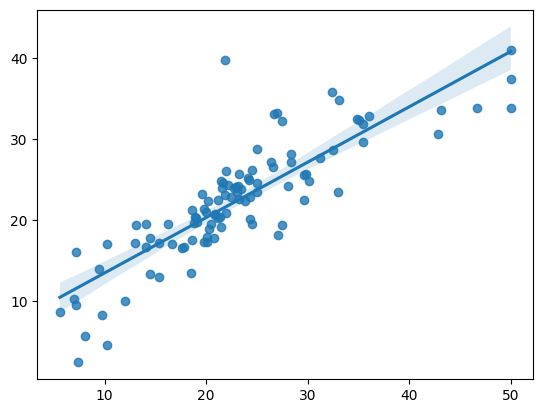

In [ ]:
sns.regplot(x=y_test, y=y_pred)

In [ ]:
from sklearn import metrics
print("Mean Absolute Error is ", metrics.mean_absolute_error(y_pred, y_test))
print("Mean Squared Error is ", metrics.mean_squared_error(y_pred, y_test))
print("RMSE is ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print("R2 score is ", metrics.r2_score(y_pred, y_test))

Mean Absolute Error is  3.4839355076060574
Mean Squared Error is  23.450734778780895
RMSE is  4.842595871924571
R2 score is  0.5632486553827579
